In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [1]:
print('Importation des librairies...')
import statistics
import pickle
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_importance
print(xgb.__version__)
from pandas.plotting import register_matplotlib_converters
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,roc_curve
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#from sklearn.grid_search import GridSearchCV
import seaborn as sns

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

%matplotlib inline
print('Librairies importées')

Importation des librairies...
0.90
Librairies importées


In [2]:
# Setting the data
start = pd.to_datetime('2015-01-28')
end = pd.to_datetime('2019-03-28')
delta = round((end-start).days)
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')
print('Note : On change de règles de calculs, car tous les jours ne sont pas ouvrés')

Période d'étude :  1520
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  1216  jours 
Bloc 2 : 304  jours
Note : On change de règles de calculs, car tous les jours ne sont pas ouvrés


In [3]:
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
df = web.DataReader('GOOG','yahoo',start,end)
df.reset_index(inplace=True)
df['Adj Close'] = df['Adj Close'].shift(-1)
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1044,2019-03-22,1230.000000,1202.824951,1226.319946,1205.500000,1714200.0,1193.000000
1045,2019-03-25,1206.397949,1187.040039,1196.930054,1193.000000,1496800.0,1184.619995
1046,2019-03-26,1202.829956,1176.719971,1198.530029,1184.619995,1901200.0,1173.020020
1047,2019-03-27,1187.558960,1159.369995,1185.500000,1173.020020,1400200.0,1168.489990
1048,2019-03-28,1171.564941,1159.431030,1171.540039,1168.489990,1012400.0,NaN


In [4]:
df = df.dropna()
df = df.drop(columns='Close',axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048 entries, 0 to 1047
Data columns (total 6 columns):
Date         1048 non-null datetime64[ns]
High         1048 non-null float64
Low          1048 non-null float64
Open         1048 non-null float64
Volume       1048 non-null float64
Adj Close    1048 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 57.3 KB


In [6]:
df.head()

,Date,High,Low,Open,Volume,Adj Close
0,2015-01-28,520.127686,507.208801,519.918884,1683800.0,507.865204
1,2015-01-29,508.292847,498.456970,508.203339,4186400.0,531.594604
2,2015-01-30,536.915344,512.698608,513.036743,5606400.0,525.587646
3,2015-02-02,530.082947,515.712036,528.819885,2849800.0,526.343506
4,2015-02-03,530.480713,520.396240,525.110291,2034800.0,519.898987


In [7]:
Xtrain = df.iloc[:bloc1,1:5]
Xtest = df.iloc[bloc1:,1:5]
ytrain = df.iloc[:bloc1,5]
ytest = df.iloc[bloc1:,5]

In [8]:
Xtrain.head()

,High,Low,Open,Volume
0,520.127686,507.208801,519.918884,1683800.0
1,508.292847,498.456970,508.203339,4186400.0
2,536.915344,512.698608,513.036743,5606400.0
3,530.082947,515.712036,528.819885,2849800.0
4,530.480713,520.396240,525.110291,2034800.0


In [9]:
ytrain.head()

0    507.865204
1    531.594604
2    525.587646
3    526.343506
4    519.898987
Name: Adj Close, dtype: float64

In [10]:
model = xgb.XGBRegressor(max_depth=7,
    learning_rate=0.01,
    n_estimators=600,
    silent=True,
    objective='reg:squarederror',
    booster='gbtree',
    n_jobs=1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=0.75,
    colsample_bytree=1,
    colsample_bylevel=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,
    missing=None,
    importance_type='gain',
    disable_default_eval_metric=1) # gbtree dart 
# objective : reg:logistic

objective [default=reg:squarederror]
reg:squarederror: regression with squared loss
reg:logistic: logistic regression
binary:logistic: logistic regression for binary classification, output probability
binary:logitraw: logistic regression for binary classification, output score before logistic transformation
binary:hinge: hinge loss for binary classification. This makes predictions of 0 or 1, rather than producing probabilities.
count:poisson –poisson regression for count data, output mean of poisson distribution
max_delta_step is set to 0.7 by default in poisson regression (used to safeguard optimization)
survival:cox: Cox regression for right censored survival time data (negative values are considered right censored). Note that predictions are returned on the hazard ratio scale (i.e., as HR = exp(marginal_prediction) in the proportional hazard function h(t) = h0(t) * HR).
multi:softmax: set XGBoost to do multiclass classification using the softmax objective, you also need to set num_class(number of classes)
multi:softprob: same as softmax, but output a vector of ndata * nclass, which can be further reshaped to ndata * nclass matrix. The result contains predicted probability of each data point belonging to each class.
rank:pairwise: Use LambdaMART to perform pairwise ranking where the pairwise loss is minimized
rank:ndcg: Use LambdaMART to perform list-wise ranking where Normalized Discounted Cumulative Gain (NDCG) is maximized
rank:map: Use LambdaMART to perform list-wise ranking where Mean Average Precision (MAP) is maximized
reg:gamma: gamma regression with log-link. Output is a mean of gamma distribution. It might be useful, e.g., for modeling insurance claims severity, or for any outcome that might be gamma-distributed.
reg:tweedie: Tweedie regression with log-link. It might be useful, e.g., for modeling total loss in insurance, or for any outcome that might be Tweedie-distributed.
base_score [default=0.5]
The initial prediction score of all instances, global bias
For sufficient number of iterations, changing this value will not have too much effect.
eval_metric [default according to objective]
Evaluation metrics for validation data, a default metric will be assigned according to objective (rmse for regression, and error for classification, mean average precision for ranking)
User can add multiple evaluation metrics. Python users: remember to pass the metrics in as list of parameters pairs instead of map, so that latter eval_metric won’t override previous one
The choices are listed below:
rmse: root mean square error
mae: mean absolute error
logloss: negative log-likelihood
error: Binary classification error rate. It is calculated as #(wrong cases)/#(all cases). For the predictions, the evaluation will regard the instances with prediction value larger than 0.5 as positive instances, and the others as negative instances.
error@t: a different than 0.5 binary classification threshold value could be specified by providing a numerical value through ‘t’.
merror: Multiclass classification error rate. It is calculated as #(wrong cases)/#(all cases).
mlogloss: Multiclass logloss.
auc: Area under the curve
aucpr: Area under the PR curve
ndcg: Normalized Discounted Cumulative Gain
map: Mean Average Precision
ndcg@n, map@n: ‘n’ can be assigned as an integer to cut off the top positions in the lists for evaluation.
ndcg-, map-, ndcg@n-, map@n-: In XGBoost, NDCG and MAP will evaluate the score of a list without any positive samples as 1. By adding “-” in the evaluation metric XGBoost will evaluate these score as 0 to be consistent under some conditions.
poisson-nloglik: negative log-likelihood for Poisson regression
gamma-nloglik: negative log-likelihood for gamma regression
cox-nloglik: negative partial log-likelihood for Cox proportional hazards regression
gamma-deviance: residual deviance for gamma regression
tweedie-nloglik: negative log-likelihood for Tweedie regression (at a specified value of the tweedie_variance_power parameter)
seed [default=0]
Random number seed.

In [11]:
model.fit(X=Xtrain, y=ytrain,early_stopping_rounds=5, verbose=1)

/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


IndexError: list index out of range

In [95]:
ytrain_pred = model.predict(Xtrain)
y_pred = model.predict(Xtest)

print('Train r2 score: ', r2_score(ytrain_pred, ytrain))
print('Test r2 score: ', r2_score(ytest, y_pred))
train_mse = mean_squared_error(ytrain_pred, ytrain)
test_mse = mean_squared_error(y_pred, ytest)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print('Train RMSE: %.4f' % train_rmse)
print('Test RMSE: %.4f' % test_rmse)

XGBoostError: need to call fit or load_model beforehand

In [37]:
from collections import OrderedDict
OrderedDict(sorted(model.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))

OrderedDict([('ema5_eurusd', 654),
             ('rsi_eurusd', 341),
             ('hl_eurusd', 247),
             ('oc_eurusd', 193),
             ('eurusd_close', 146),
             ('eurusd_Dhl', 136),
             ('eurusd_Doc', 115),
             ('ema21_eurusd', 88)])

In [38]:
most_relevant_features= list( dict((k, v) for k, v in model.get_booster().get_fscore().items() if v >= 4).keys())
print(most_relevant_features)

['ema5_eurusd', 'ema21_eurusd', 'rsi_eurusd', 'eurusd_close', 'oc_eurusd', 'hl_eurusd', 'eurusd_Dhl', 'eurusd_Doc']


train_x=df[most_relevant_features]
train_y=df['EURUSD']
X_train, X_test, y_train, y_test  = train_test_split(train_x, train_y, test_size = 0.2, random_state = 0)

In [40]:
tip = df['EURUSD'].iloc[-4892:]

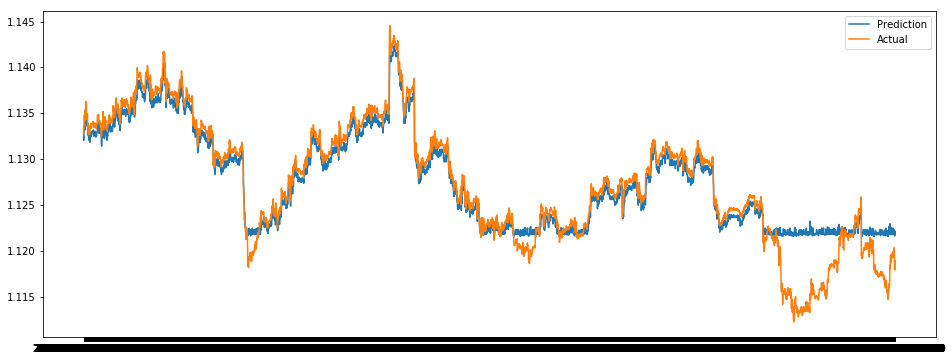

In [41]:
plt.figure(figsize=(16,6))
plt.plot(y_pred,label = 'Prediction')
plt.plot(tip,label = 'Actual')
plt.legend()

In [272]:
backtest = pd.DataFrame()
backtest['Close_eurusd'] = df.iloc[-4890:,8]
backtest['long'] = predictions_long
backtest['short'] = predictions_short
backtest.head()

,Close_eurusd,long,short
Date,,,
20190221 11:00:00,1.133405,0,0
20190221 11:15:00,1.133390,1,0
20190221 11:30:00,1.133845,0,0
20190221 11:45:00,1.134440,1,0
20190221 12:00:00,1.134775,1,0


In [273]:
#backtest = backtest.iloc[bloc1:,:]
backtest.head()

,Close_eurusd,long,short
Date,,,
20190221 11:00:00,1.133405,0,0
20190221 11:15:00,1.133390,1,0
20190221 11:30:00,1.133845,0,0
20190221 11:45:00,1.134440,1,0
20190221 12:00:00,1.134775,1,0


In [274]:
backtest['long'].sum(),backtest['short'].sum()

(772, 738)

In [275]:
len(predictions_short),predictions_short.sum(),len(prediction_short),prediction_short.sum(),len(predictions_long),predictions_long.sum(),len(prediction_long),prediction_long.sum()

(4890, 738, 4890, 4890.0, 4890, 772, 4890, 4889.9995)

In [276]:
backtest.shape

(4890, 3)

In [277]:
#backtest = backtest.iloc[4800:,:]

In [278]:
backtest.head()

,Close_eurusd,long,short
Date,,,
20190221 11:00:00,1.133405,0,0
20190221 11:15:00,1.133390,1,0
20190221 11:30:00,1.133845,0,0
20190221 11:45:00,1.134440,1,0
20190221 12:00:00,1.134775,1,0


In [279]:
backtest['long'].sum(),backtest['short'].sum()

(772, 738)

In [281]:
long_pos = 0
short_pos = 0
equity = 100000
price_buy_long = 0
price_buy_short = 0
equity_list = []
nb_transaction = 0
col_profit = []
max_gain = (0,0)
max_loss = (0,0)
stop_loss_short = 0.011
stop_loss_long = -0.013
ticket = 100000
target_long = 0.003
target_short = -0.003
longueur = (backtest.shape[0])-1
long_exit = []
short_exit = []
long_sl = []
short_sl = []
go_long = []
go_short = []
lea = 0
sea = 0
gain_sum = 0
loss_sum = 0

print("Boucle de backtest initiée!")

import sys
orig_stdout = sys.stdout
f = open('backtestv2_5.txt', 'w')
sys.stdout = f

for i in range(0,longueur):
    
    if backtest.iloc[i,1] == 2 and long_pos == 0:
        long_pos = 1
        nb_transaction += 1
        price_buy_long = backtest.iloc[i,0]
        equity = equity - 1.5
        equity_list.append(equity)
        col_profit.append(0)
        go_long.append(1)
        print('\n Go Long enclenché le ',backtest.index[i],' pour $',price_buy_long)
        print('Nouvel equity :',equity)
        
    elif backtest.iloc[i,1] == 1 and long_pos == 1 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', On maintient la position long ouverte')
        col_profit.append(0)
    
    elif backtest.iloc[i,1] == 0 and long_pos == 1:
        
        if (backtest.iloc[i,0] - price_buy_long) > target_long:
            print('\n close de position long le ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_long)
            print('variation des deux ', backtest.iloc[i,0] - price_buy_long)
            print(' pnl :',(backtest.iloc[i,0] - price_buy_long)*ticket)
            equity = equity - 1.5 + ((backtest.iloc[i,0] - price_buy_long) * ticket)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            long_exit.append(1)
            col_profit.append(( backtest.iloc[i,0] - price_buy_long) * ticket)
            if ((backtest.iloc[i,0] - price_buy_long) * ticket) > max_gain[1]:
                max_gain = (i,((backtest.iloc[i,0] - price_buy_long) * ticket))
                
            #elif ((backtest.iloc[i,0] - price_buy_long) * ticket) < max_loss[1]:
             #   max_loss = (i,((backtest.iloc[i,0] - price_buy_long) * ticket))
            equity_list.append(equity)
            gain_sum = gain_sum + (backtest.iloc[i,0] - price_buy_long)*ticket
            long_pos = 0
        
        elif (backtest.iloc[i,0] - price_buy_long) < stop_loss_long:
            equity = equity - 1.5 + ((backtest.iloc[i,0] - price_buy_long) * ticket)
            print('\n sortie stop_loss du long ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_long)
            print(' pnl :',(backtest.iloc[i,0] - price_buy_long)*ticket)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            long_sl.append(1)
            col_profit.append(((backtest.iloc[i,0] - price_buy_long) * ticket))
            #if ((backtest.iloc[i,0] - price_buy_long) * ticket) > max_gain[1]:
                #max_gain = (i,((backtest.iloc[i,0] - price_buy_long) * ticket))
                
            if ((backtest.iloc[i,0] - price_buy_long) * ticket)< max_loss[1]:
                max_loss = (i,((backtest.iloc[i,0] - price_buy_long) * ticket))
            equity_list.append(equity)
            long_pos = 0
            loss_sum = loss_sum + abs(( backtest.iloc[i,0] - price_buy_long)*ticket)
        
    elif backtest.iloc[i,1] == 0 and long_pos == 0 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', il ne se passe rien')
        col_profit.append(0)
            
for i in range(0,longueur):
    
    if backtest.iloc[i,2] == 1 and short_pos == 0:
        short_pos = 1
        nb_transaction += 1
        price_buy_short = backtest.iloc[i,0]
        equity = equity - 1.5
        equity_list.append(equity)
        col_profit.append(0)
        go_short.append(1)
        print('\n Short on le ',backtest.index[i],' pour $',price_buy_short)
        print('Le nouvel equity est de :',equity,'$')
        
    elif backtest.iloc[i,2] == 1 and short_pos == 1 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', on reste en position Short')
        col_profit.append(0)
    
    elif backtest.iloc[i,2] == 0 and short_pos == 1:
        
        if (backtest.iloc[i,0] - price_buy_short) < target_short:
            print('\n sortie du position short ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_short)
            print(' pnl :',( backtest.iloc[i,0] - price_buy_short)*ticket)
            equity = equity - 1.5 + abs((backtest.iloc[i,0] - price_buy_short) * ticket)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            short_exit.append(1)
            col_profit.append(abs((( backtest.iloc[i,0] - price_buy_short) * ticket)))
            if abs((backtest.iloc[i,0] - price_buy_short) * ticket) > max_gain[1]:
                max_gain = (i,abs((backtest.iloc[i,0] - price_buy_short) * ticket))
                
            #elif ((backtest.iloc[i,0] - price_buy_short) * ticket)< max_loss[1]:
             #   max_loss = (i,((backtest.iloc[i,0] - price_buy_short) * ticket))
            equity_list.append(equity)
            short_pos = 0
            gain_sum = gain_sum + abs((backtest.iloc[i,0] - price_buy_short) * ticket)
        
        elif (backtest.iloc[i,0] - price_buy_short) > stop_loss_short:
            equity = equity - 1.5 - abs((backtest.iloc[i,0] - price_buy_short)* ticket)
            print('\n sortie stop_loss du short ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_short)
            print(' pnl :',-(backtest.iloc[i,0] - price_buy_short)*ticket)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            short_sl.append(1)
            col_profit.append(-((backtest.iloc[i,0] - price_buy_short) * ticket))
            #if ((backtest.iloc[i,0] - price_buy_short) * ticket) > max_gain[1]:
             #   max_gain = (i,((backtest.iloc[i,0] - price_buy_short) * ticket))
                
            if (-(backtest.iloc[i,0] - price_buy_short) * ticket)< max_loss[1]:
                max_loss = (i,(-(backtest.iloc[i,0] - price_buy_short) * ticket))
            equity_list.append(equity)
            short_pos = 0
            loss_sum = loss_sum + abs((backtest.iloc[i,0] - price_buy_short) * ticket)
        
    elif backtest.iloc[i,2] == 0 and short_pos == 0 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', il ne se passe rien')
        col_profit.append(0)    


if long_pos == 1 :
    print("Sortie d'une position long en l'air")
    equity = equity - 1.5 + ((backtest.iloc[longueur,0]- price_buy_long) * ticket)
    lea = 1
if short_pos == 1 :
    print("Sortie d'une position short en l'air")
    equity = equity - 1.5 + ((backtest.iloc[longueur,0]- price_buy_short) * ticket)
    sea = 1
    
            
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",round(equity-100000),'!. En ',nb_transaction,' transactions.' )
f.close()
sys.stdout = orig_stdout
print('Boucle terminée')
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",round(equity-100000),'!. En ',nb_transaction,' transactions.' )


Boucle de backtest initiée!
Boucle terminée

  Les gains faramineux s'élèvent à : $ 1547.0 !. En  39  transactions.


In [169]:
longueur_long = (backtest.shape[0])-1

In [170]:
backtest.iloc[longueur,2]

1

In [171]:
len(equity_list),backtest['long'].sum(),nb_transaction,equity-100000,backtest['short'].sum()

(5223, 776, 65, 1610.5000000000437, 769)

gain_sum = 0
loss_sum = 0
for i in range(len(col_profit)):
    if col_profit[i]>0:
        gain_sum+=col_profit[i]
    else :
        loss_sum+=col_profit[i]
        

In [172]:
len(equity_list),len(col_profit)

(5223, 5223)

In [173]:
backtest_graph = pd.DataFrame()
backtest_graph['equity'] = equity_list
backtest_graph['col_profit'] = col_profit
#backtest_graph['col_is_win'] = col_is_win
#backtest_graph['col_cours'] = col_cours

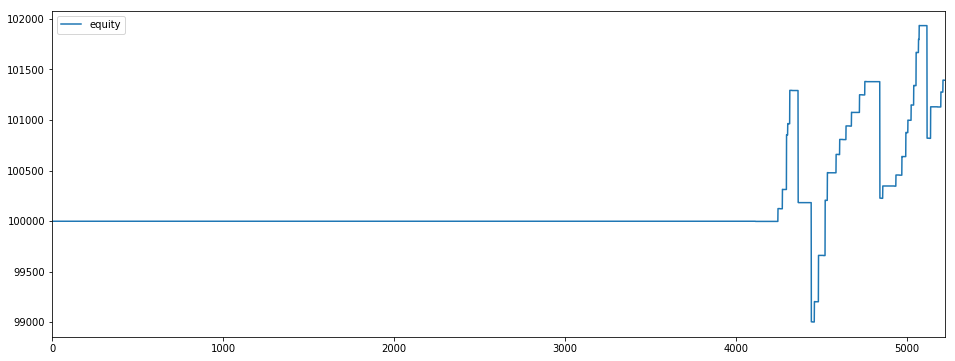

In [174]:
plt.figure(figsize=(16,6))
backtest_graph['equity'].plot()
plt.legend()

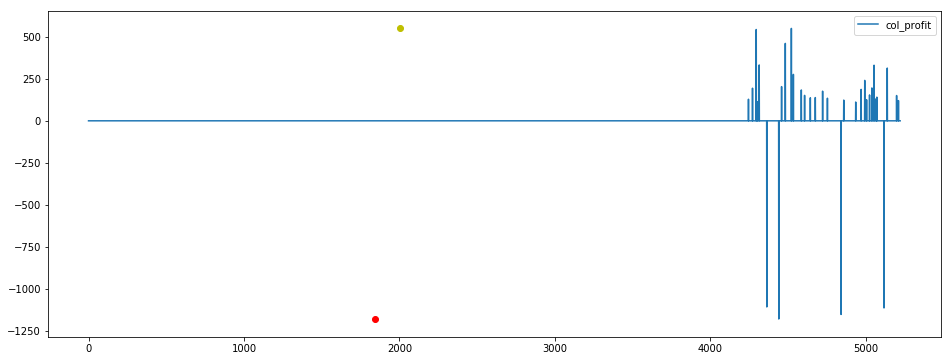

In [175]:
plt.figure(figsize=(16,6))
plt.plot(backtest_graph['col_profit'])
plt.scatter(max_gain[0],max_gain[1],c='y')
plt.scatter(max_loss[0],max_loss[1],c='r')
plt.legend()

In [176]:
cumul_profit = sum(col_profit)
nul_profit = col_profit.count(0)
len_profit = len(col_profit)

In [177]:
print('Période testée :')
print('Début : ',backtest.index[0])
print('Fin : ',backtest.index[-1])
print('ROC long : ',round(roc_long*100,2),'%')
print('ROC short : ',round(roc_short*100,2),'%')
print('Transaction à $100,000')
print('Equity initiale : $100,000')
print('Equity finale : ',round(equity,2))
print('Gain généré :',round(equity-100000,2),'$')
print('Nombre de transactions : ',nb_transaction)
print('Nombre de Long : ',sum(go_long))
print('Nombre de Short : ',sum(go_short))
print('Nombre winners : ',sum(long_exit) + sum(short_exit))
print('Nombre loosers : ',sum(long_sl) + sum(short_sl))
print('Nombre de long winners : ',sum(long_exit))
print('Nombre de short winners : ',sum(short_exit))
print('Nombre de long loosers : ',sum(long_sl))
print('Nombre de short loosers : ',sum(short_sl))
print("Nombre de short en l'air : ", sea)
print("Nombre long en l'air : ",lea)
print('Fees : ',nb_transaction*150)
#print('Nombre de positions gagnées',sum(col_is_win))
#print('Nombre de positions perdues',sum(col_close_pos)-sum(col_is_win))
print('Gain maximal',round(max(col_profit),2),' ',round(max_gain[1],2))
print('Perte maximale',round(min(col_profit),2),' ',round(max_loss[1],2))
print('Moyenne du gain',round(((equity-100000)/(nb_transaction/2)),2))
print('Somme de tous les gains',round(gain_sum,2))
print('Somme de tous le loss',round(abs(loss_sum),2))
print('profit factor',round(abs(gain_sum/loss_sum),2))


Période testée :
Début :  20190221  10:15:00
Fin :  20190505  23:30:00
ROC long :  83.09 %
ROC short :  86.47 %
Transaction à $100,000
Equity initiale : $100,000
Equity finale :  101610.5
Gain généré : 1610.5 $
Nombre de transactions :  65
Nombre de Long :  0
Nombre de Short :  33
Nombre winners :  28
Nombre loosers :  4
Nombre de long winners :  0
Nombre de short winners :  28
Nombre de long loosers :  0
Nombre de short loosers :  4
Nombre de short en l'air :  1
Nombre long en l'air :  0
Fees :  9750
Gain maximal 548.5   548.5
Perte maximale -1176.5   -1176.5
Moyenne du gain 49.55
Somme de tous les gains 6033.0
Somme de tous le loss 4542.0
profit factor 1.33


In [517]:
# save the model to disk
filename = 'finalized_model_long.sav'
pickle.dump(model_long, open(filename, 'wb'))
filename = 'finalized_model_short.sav'
pickle.dump(model_short, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)